In [77]:
import pandas as pd
import plotly.express as px
from pycaret.classification import *

df = pd.read_csv("/Users/seansozi/Downloads/churn.csv")


df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [37]:
data_types = df.dtypes
print(data_types)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [38]:
non_numeric_values = df['TotalCharges'].loc[~df['TotalCharges'].str.isnumeric()].unique()
print(non_numeric_values)


['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']


In [39]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].astype(float)


In [40]:
missing_values = df.isnull().sum()

print(missing_values)

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [49]:
s = setup(df, target = 'Churn', ignore_features = ['customerID'])

,Description,Value
0,Session id,6534
1,Target,Churn
2,Target type,Binary
3,Target mapping,"No: 0, Yes: 1"
4,Original data shape,"(7043, 21)"
5,Transformed data shape,"(7043, 41)"
6,Transformed train set shape,"(4930, 41)"
7,Transformed test set shape,"(2113, 41)"
8,Ignore features,1
9,Ordinal features,5


In [54]:
best_models = compare_models(sort = 'AUC')


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8055,0.8494,0.5345,0.6672,0.5922,0.4668,0.4726,0.6590
ada,Ada Boost Classifier,0.8008,0.8474,0.5383,0.6510,0.5885,0.4588,0.4629,0.4180
lr,Logistic Regression,0.8051,0.8471,0.5543,0.6587,0.6008,0.4733,0.4772,0.4370
lda,Linear Discriminant Analysis,0.7978,0.8402,0.5650,0.6334,0.5968,0.4625,0.4641,0.3530
lightgbm,Light Gradient Boosting Machine,0.7927,0.8380,0.5337,0.6297,0.5770,0.4411,0.4442,0.3780
qda,Quadratic Discriminant Analysis,0.6619,0.8279,0.8701,0.4360,0.5789,0.3478,0.4081,0.3530
rf,Random Forest Classifier,0.7862,0.8228,0.4878,0.6246,0.5466,0.4098,0.4158,0.5420
nb,Naive Bayes,0.6994,0.8211,0.8525,0.4639,0.6006,0.3917,0.4389,0.2810
et,Extra Trees Classifier,0.7675,0.7920,0.4634,0.5769,0.5132,0.3632,0.3673,0.6470
knn,K Neighbors Classifier,0.7598,0.7446,0.4442,0.5599,0.4942,0.3398,0.3444,0.3030


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

In [56]:
tuned_best_model = tune_model(best_models)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7951,0.8385,0.5000,0.6436,0.5628,0.4317,0.4376
1,0.8114,0.8539,0.6462,0.6412,0.6437,0.5154,0.5154
2,0.7688,0.7905,0.4580,0.5825,0.5128,0.3641,0.3686
3,0.8215,0.8669,0.5649,0.7048,0.6271,0.5117,0.5171
4,0.7992,0.8503,0.5649,0.6379,0.5992,0.4659,0.4674
5,0.7830,0.8431,0.5038,0.6111,0.5523,0.4108,0.4141
6,0.8032,0.8496,0.5191,0.6667,0.5837,0.4575,0.4636
7,0.7890,0.8399,0.5191,0.6239,0.5667,0.4288,0.4320
8,0.7789,0.8056,0.5038,0.6000,0.5477,0.4029,0.4056


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


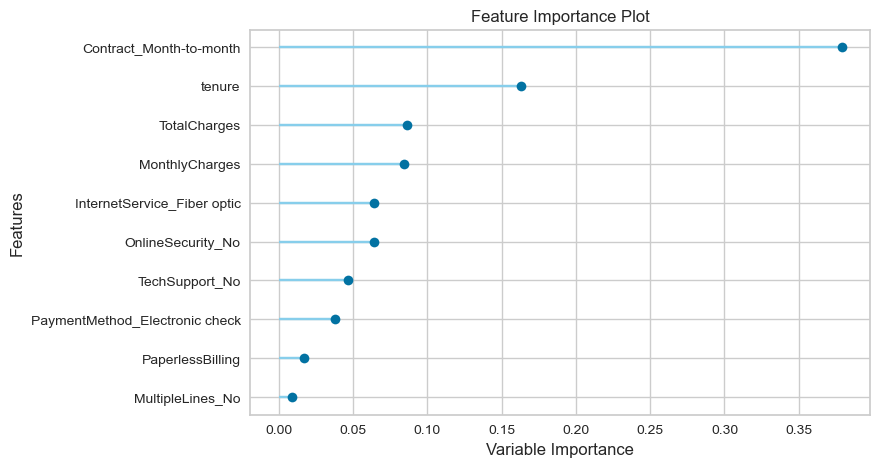

In [60]:
plot_model(best_models, plot = 'feature')


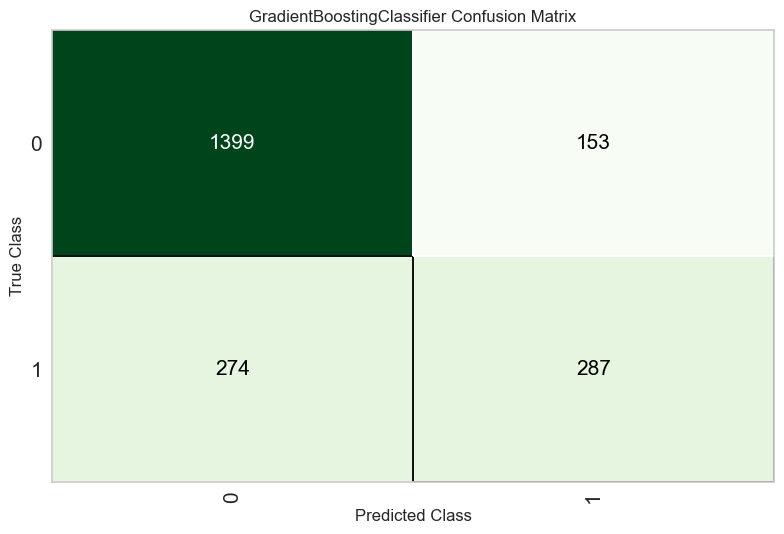

In [62]:
plot_model(best_models, plot = 'confusion_matrix')